In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
data_table = pd.read_csv('mnist_train.csv')
data_table.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
label = data_table['label']
data = data_table.drop('label',axis=1)

data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
print(label.shape)

(42000,)


In [8]:
fullabel = label.head(42000)
fulldata = data.head(42000)
print(fulldata.shape)

(42000, 784)


In [13]:
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(fulldata)
print(standardized_data.shape)


(42000, 784)


In [16]:
fulldata.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# t-sne

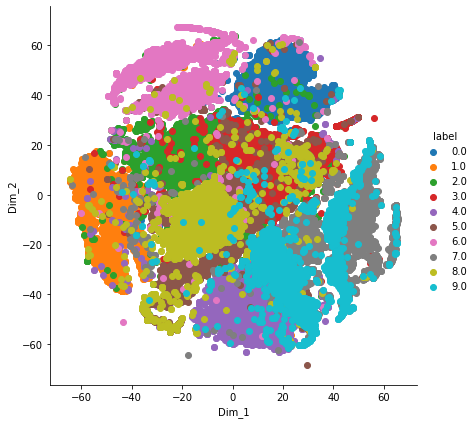

In [20]:
from sklearn.manifold import TSNE
fulldata = standardized_data[:,:]
# since t-SNE is a randomized/stochastic/probabilistic algorithm it might show different results everytime it is run.
# random_state=0 makes sure the results are not different everytime t-SNE is run.
model = TSNE(n_components=2,random_state=0)
tsne_data = model.fit_transform(fulldata)

# Creating a new data frame which helps us in ploting the result data
tsne_data = np.vstack((tsne_data.T, fullabel)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sns.FacetGrid(tsne_df, hue="label", height=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()


notes:
Keep the Step(no. of iterations) large enough where the shape of the dataset stablizes.
Always run t-SNE for multiple perplexity values and try to find the most stable shape.(slow so try on colab)
Never keep the perplexity equal to the number of datapoints, otherwise it results in a mess as t-SNE does a terrible job at it.
Since t-SNE is not a deterministic alogrithm but a stochastic/probabilistic algorithm, the results could be slightly different for the same perplexity and step values everytime it is applied.
T-SNE expands a dense cluster and shrinks a sparse cluster and hence density size of clusters cannot be found out.
The distances between clusters might not convey anything.
T-SNE doesn't preserve the distances between clusters.
Never try to make sense from random data.